In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [41]:
df0 = pd.read_pickle('No_Review.pkl')

In [91]:
# must drop = no additional value
to_drop = df0.nunique()[df0.nunique()==1].index.tolist()
to_drop.append('id')

In [92]:
df = df0.drop(to_drop,axis = 1).dropna().reset_index(drop = True).copy()

# Cleaning and Standardizing

In [93]:
# Drop any listing that hasn't been up for 365 days
df = df[df['days_since_host']>=365].reset_index(drop = True)
# standardizing only one avail days : average monthly
df['availability'] = df['availability_30']
df = df.drop(['availability_30','availability_60','availability_90','availability_365'], axis = 1)

# dropping any columns that now have no value
to_drop = df.nunique()[df.nunique()==1].index.tolist()
df = df.drop(to_drop,axis = 1).dropna().reset_index(drop = True).copy()

Text(0.5, 0, 'Days')

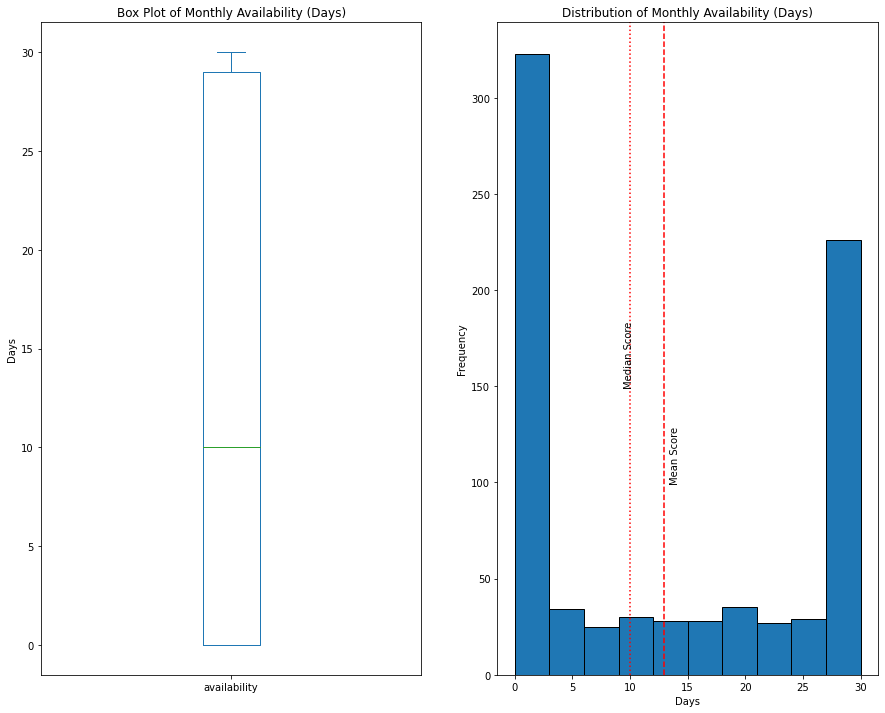

In [94]:
# Plotting new availability
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,12))
axs[0].set_title('Box Plot of Monthly Availability (Days)')
axs[1].set_title('Distribution of Monthly Availability (Days)')

bp = df['availability'].plot(kind = 'box', ax = axs[0])
hp = df['availability'].plot(kind = 'hist', edgecolor = 'black', ax = axs[1])

bp.set_ylabel('Days')
hp.axvline(x = df['availability'].mean(), color = 'r',linestyle='--')
hp.axvline(x = df['availability'].median(), color = 'r',linestyle=':')
hp.text(df['availability'].mean()+.5,100, 'Mean Score',rotation = 90)
hp.text(df['availability'].median()-.5,150, 'Median Score',rotation = 90)
hp.set_xlabel('Days')

# Correlation with Price and Availability

In [95]:
def correlation(target_col):
    results = []
    cols = df.columns
    for col in cols:
        corr, p = st.pearsonr(df[col], df[target_col])
        results.append((col, corr, p))
    corr_df = pd.DataFrame(results, columns=['Feature', 'Correlation', 'P-Value'])
    corr_df = corr_df.set_index('Feature')
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)[1:]
    corr_df = corr_df.reset_index()
    # Top 5 negative and Positive Fields with price
    top_corr = pd.concat([corr_df[-10:].sort_values(by = 'Correlation').reset_index(drop = True),corr_df.head(10).reset_index(drop = True)], axis = 1)
    top_corr.columns = ['Negative Field', 'Negative Correlation','Negative P-Value','Positive Field','Positive Correlation','Positive P-Value']
    return top_corr

In [96]:
correlation('price')

,Negative Field,Negative Correlation,Negative P-Value,Positive Field,Positive Correlation,Positive P-Value
0,bathrooms_shared,-0.359918,2.025536e-25,accommodates,0.335978,3.624069e-22
1,room_type_Private room,-0.338382,1.758768e-22,bedrooms,0.287506,2.094317e-16
2,amenities_1,-0.255644,3.532809e-13,beds,0.238149,1.386969e-11
3,amenities_2,-0.238671,1.248094e-11,bathrooms_count,0.221768,3.343612e-10
4,description_3,-0.201333,1.268187e-08,host_identity_verified,0.190324,7.736928e-08
5,host_acceptance_rate,-0.185242,1.721626e-07,host_total_listings_count,0.160694,6.052412e-06
6,mi_to_loop,-0.181264,3.171695e-07,description_5,0.138672,9.701676e-05
7,"host_verifications_['email', 'phone']",-0.142685,6.023266e-05,host_listings_count,0.133943,1.673503e-04
8,room_type_Shared room,-0.112922,1.529940e-03,amenities_6,0.122842,5.619438e-04
9,neighborhood_overview_2,-0.108350,2.366960e-03,amenities_7,0.113896,1.391396e-03


In [97]:
correlation('availability')

,Negative Field,Negative Correlation,Negative P-Value,Positive Field,Positive Correlation,Positive P-Value
0,amenities_7,-0.484964,1.508601e-47,"host_verifications_['email', 'phone']",0.285753,3.233766e-16
1,host_listings_count,-0.476156,1.143276e-45,neighborhood_overview_2,0.263871,5.695173e-14
2,host_total_listings_count,-0.459484,2.946256e-42,description_2,0.253721,5.362066e-13
3,host_acceptance_rate,-0.369182,9.358842e-27,host_is_superhost,0.248284,1.712639e-12
4,maximum_nights,-0.339276,1.341830e-22,accommodates,0.240413,8.762697e-12
5,description_1,-0.289534,1.261882e-16,mi_to_lincoln,0.235899,2.178398e-11
6,description_4,-0.274729,4.639693e-15,mi_to_loop,0.234252,3.022777e-11
7,neighborhood_overview_3,-0.239836,9.854545e-12,amenities_6,0.205508,6.215479e-09
8,host_response_time_within an hour,-0.145183,4.447965e-05,beds,0.203821,8.306885e-09
9,host_response_rate,-0.140874,7.480571e-05,amenities_4,0.197349,2.469352e-08


<AxesSubplot:>

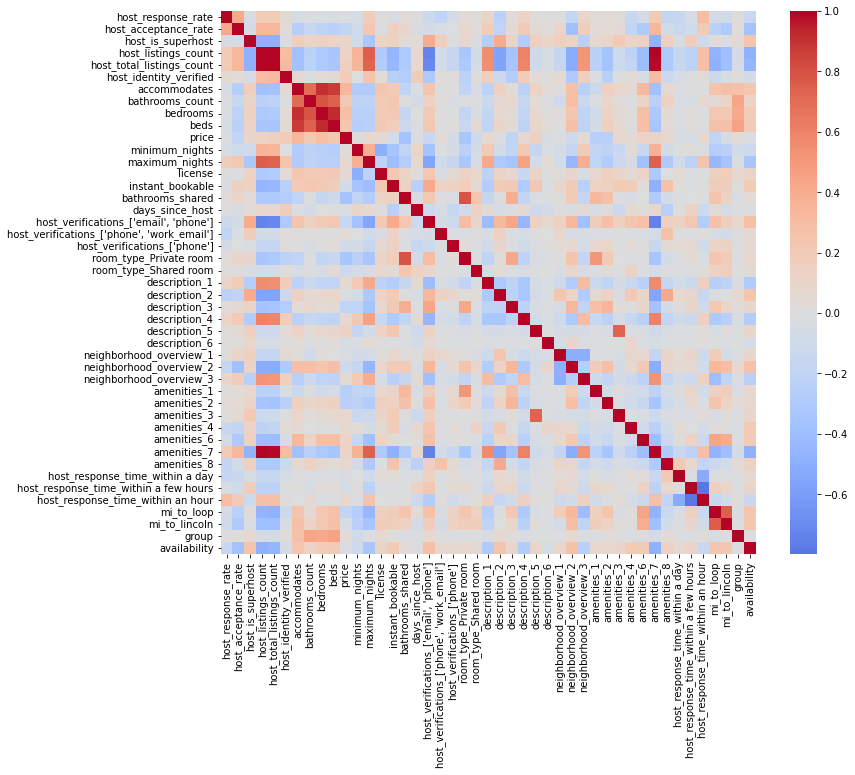

In [98]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)

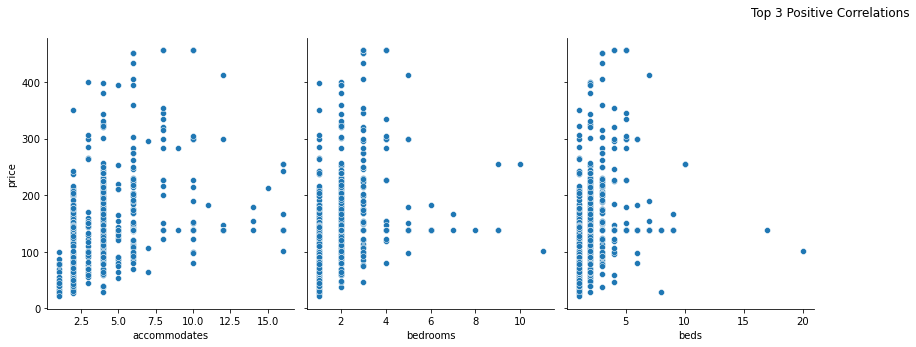

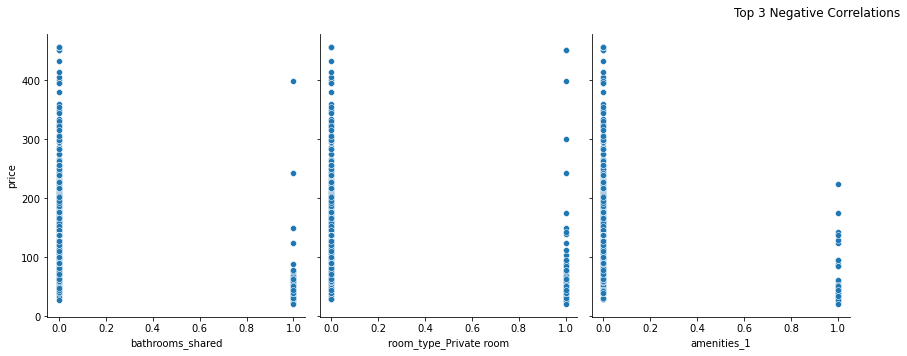

In [99]:
# Plot scatterplots of the most correlated features with 'price'
a = sns.pairplot(df, x_vars=correlation('price')[:3]['Positive Field'].tolist(), y_vars=['price'], kind='scatter')
a.fig.suptitle('Top 3 Positive Correlations', y = 1.05, x = 1)
a.fig.set_size_inches(12,5)
b = sns.pairplot(df, x_vars=correlation('price')[:3]['Negative Field'].tolist(), y_vars=['price'], kind='scatter')
b.fig.suptitle('Top 3 Negative Correlations', x = .95)
b.fig.set_size_inches(12,5)
plt.tight_layout()

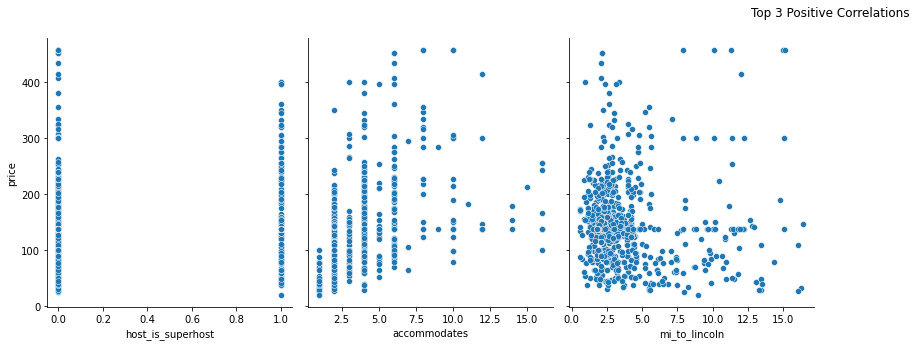

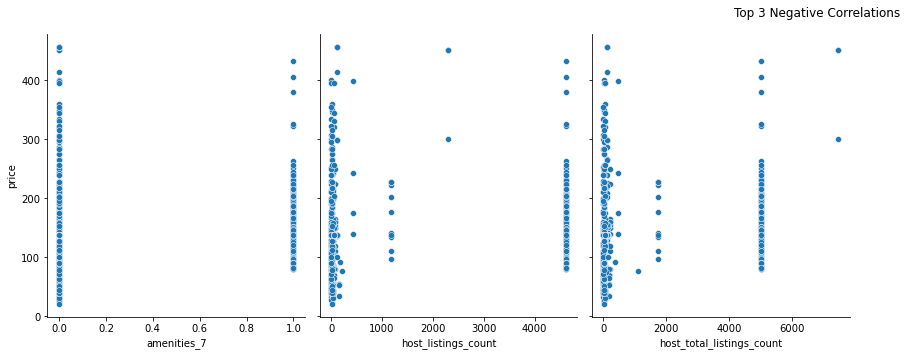

In [100]:
# Plot scatterplots of the most correlated features with availibility
a = sns.pairplot(df, x_vars=correlation('availability')[3:6]['Positive Field'].tolist(), y_vars=['price'], kind='scatter')
a.fig.suptitle('Top 3 Positive Correlations', y = 1.05, x = 1)
a.fig.set_size_inches(12,5)
b = sns.pairplot(df, x_vars=correlation('availability')[:3]['Negative Field'].tolist(), y_vars=['price'], kind='scatter')
b.fig.suptitle('Top 3 Negative Correlations', x = .95)
b.fig.set_size_inches(12,5)
plt.tight_layout()

# Looking into Miles from Lincoln Park/Loop

In [104]:
hue_var = 'accommodates'
location = 'mi_to_lincoln'

Text(0.5, 1.0, 'Miles to hotspots and Nightly Price')

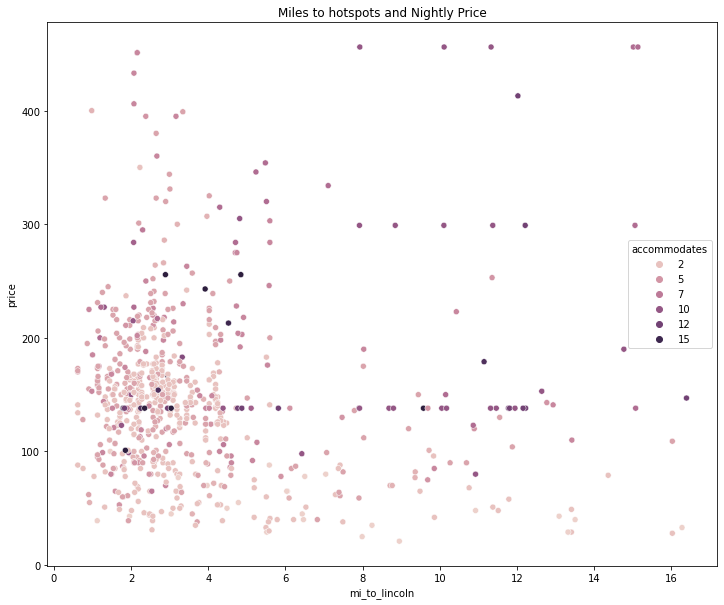

In [105]:
# distance in miles from hot spots (scatter plot) w price
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = location, y = 'price', hue = hue_var)
plt.title('Miles to hotspots and Nightly Price')

C:\Users\C388455\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\C388455\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\C388455\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


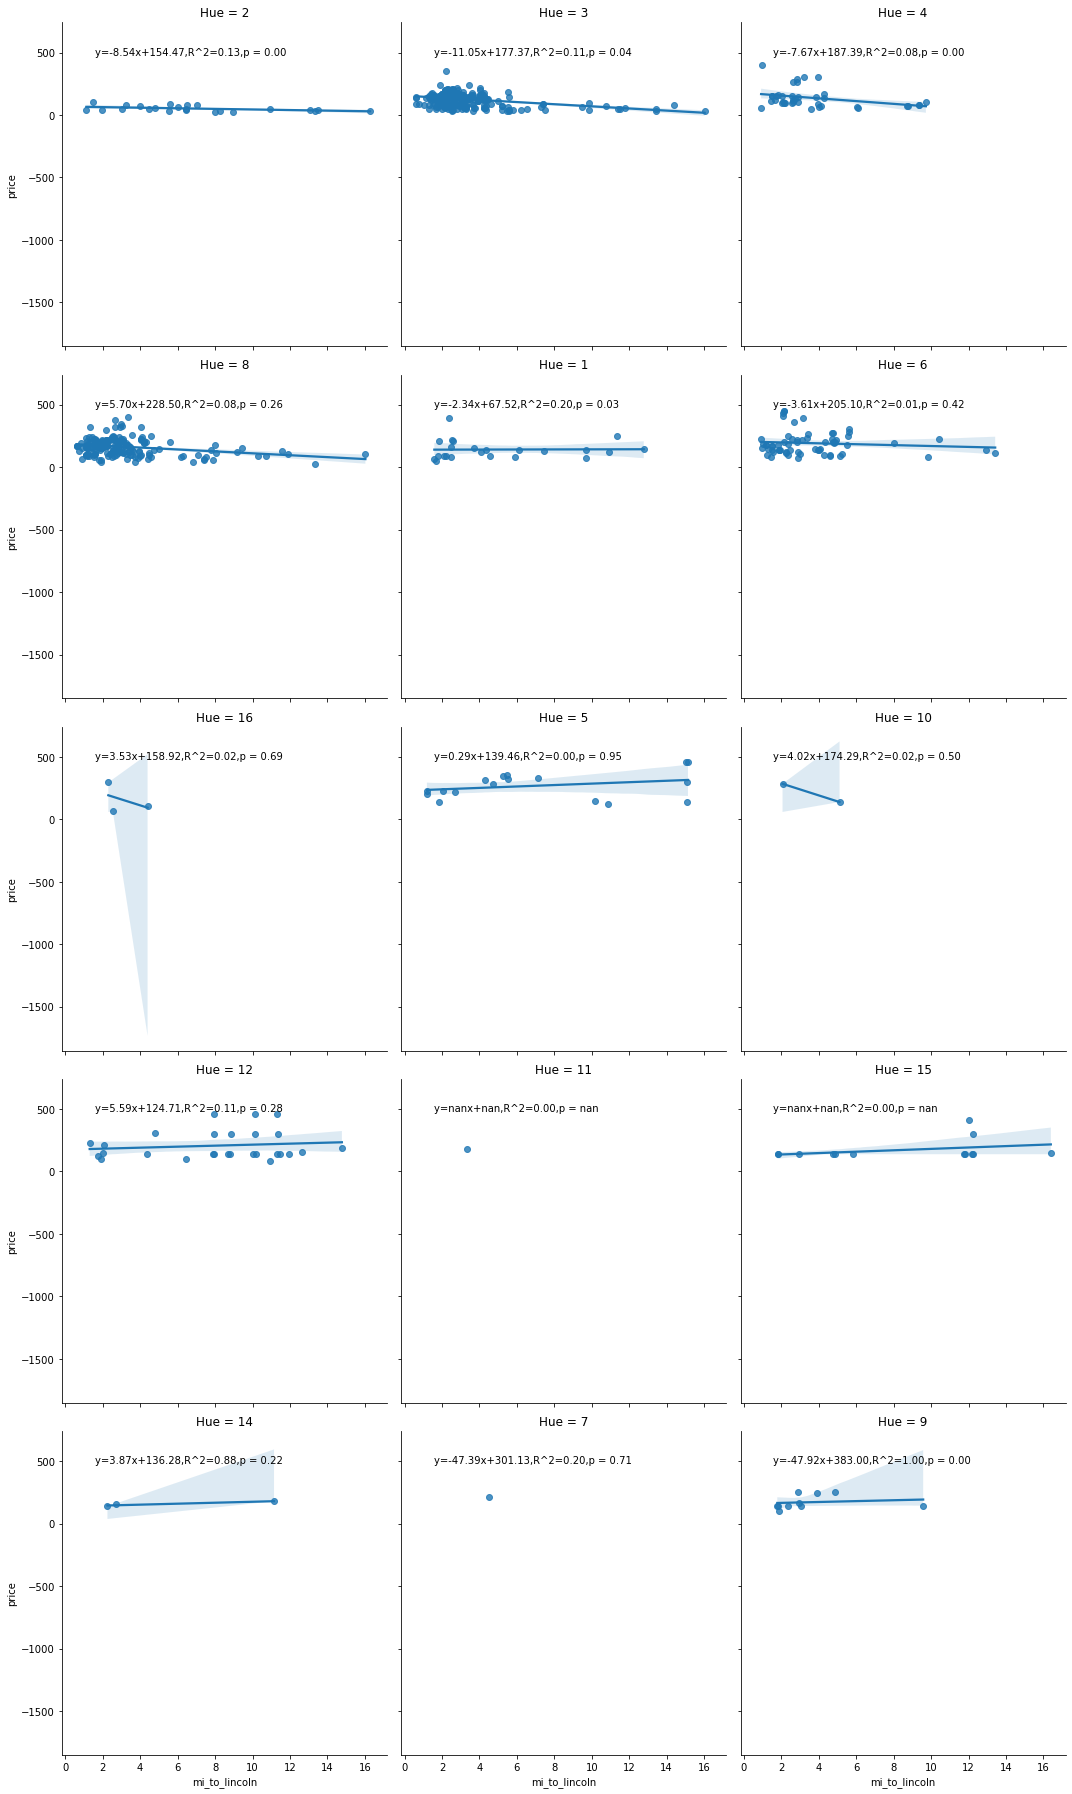

In [106]:
# Does accommodation # category have different relationship with price?
g = sns.FacetGrid(df, col = hue_var, col_wrap = 3, height = 5)
g.map(sns.regplot, location, 'price')
for i,hue in enumerate(df[hue_var].unique()):
    g.axes[i].set_title(f'Hue = {hue}')
    x = df[df[hue_var]==hue][location]
    y = df[df[hue_var]==hue]['price']
    slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
    formula = f'y={slope:.2f}x+{intercept:.2f},R^2={r_value**2:.2f},p = {p_value:.2f}'
    g.axes[i].text(.1,.9,formula,transform=g.axes[i].transAxes)    

Text(0.5, 1.0, 'Miles to hot spot and Average Monthly Availability')

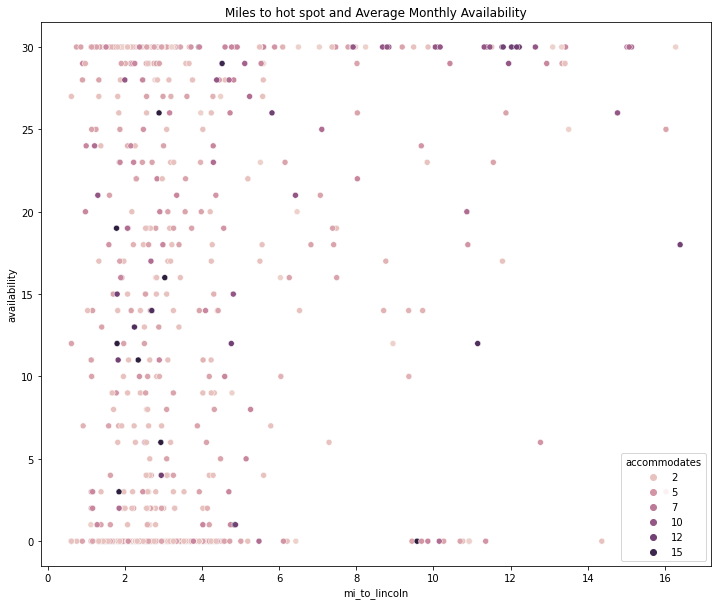

In [107]:
# distance in miles from hotspot (scatter plot) w avail
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = location, y = 'availability', hue = hue_var)
plt.title('Miles to hot spot and Average Monthly Availability')

C:\Users\C388455\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\C388455\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\C388455\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


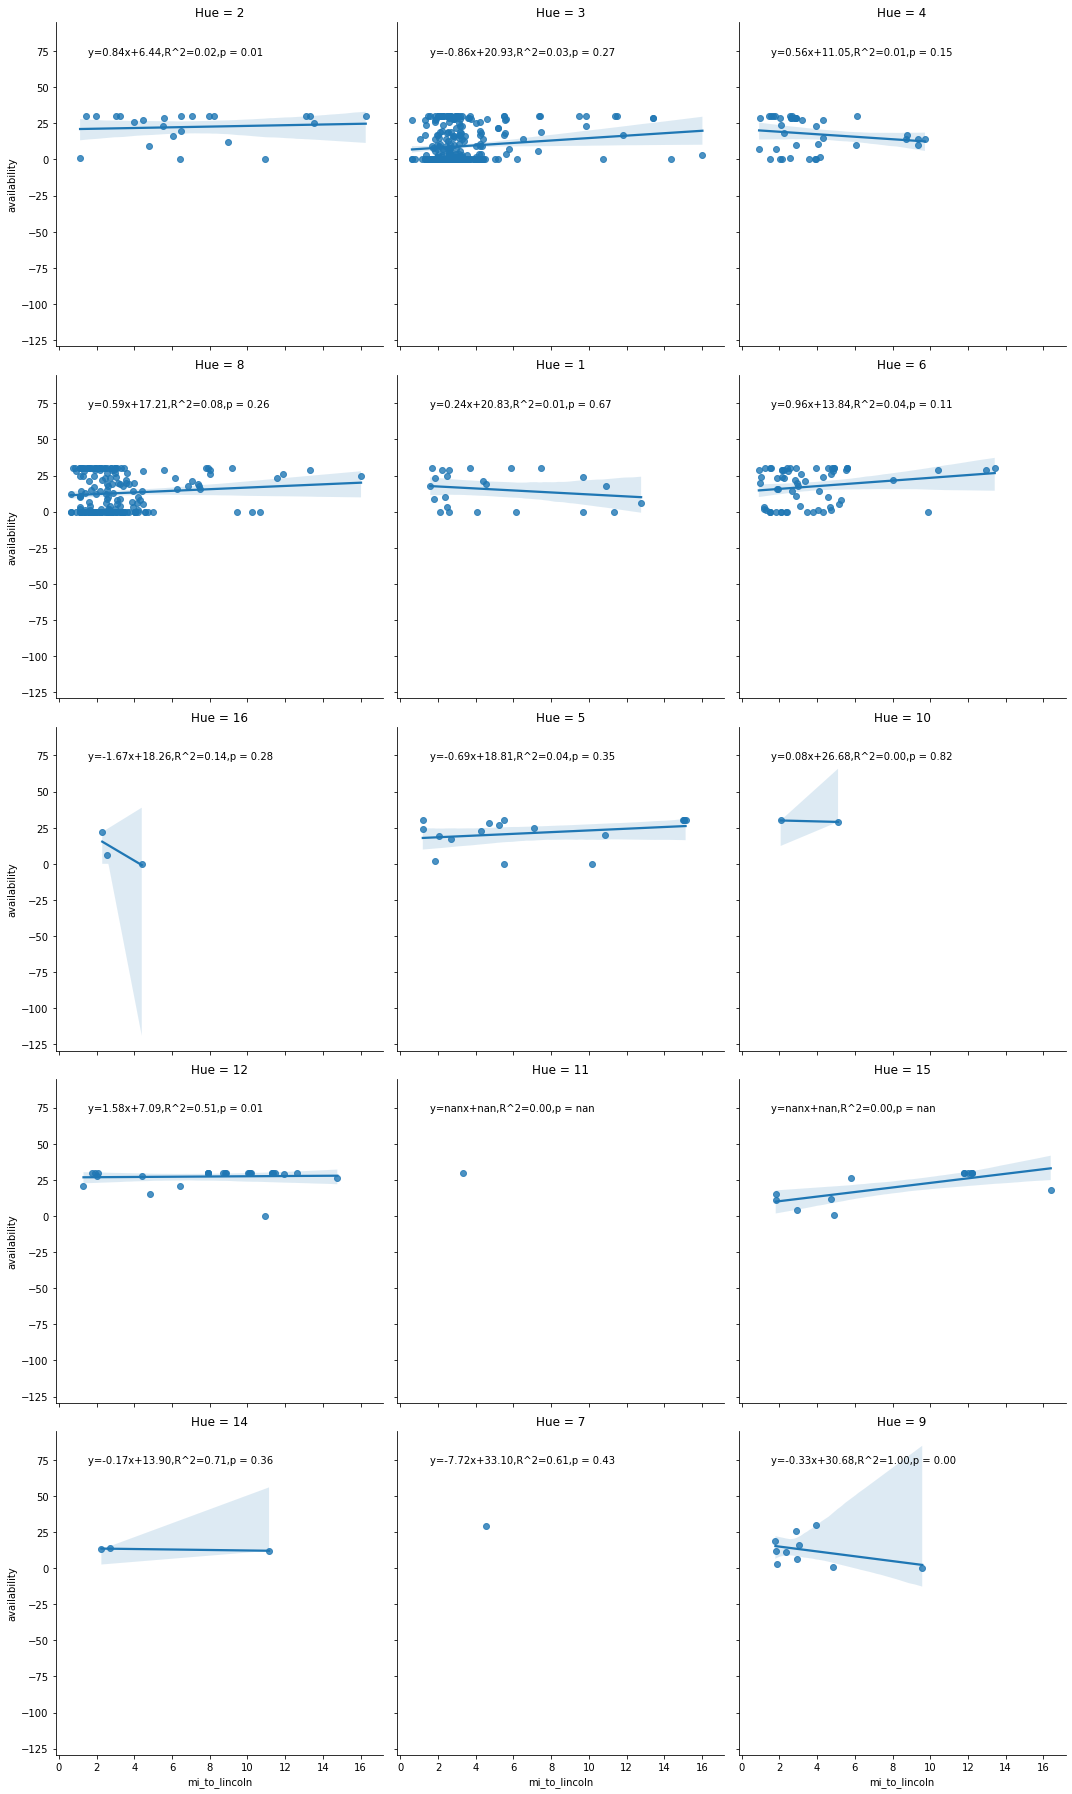

In [108]:
# Does accommodation # category have different relationship with availability?
g = sns.FacetGrid(df, col = hue_var, col_wrap = 3, height = 5)
g.map(sns.regplot, location, 'availability')
for i,hue in enumerate(df[hue_var].unique()):
    g.axes[i].set_title(f'Hue = {hue}')
    x = df[df[hue_var]==hue][location]
    y = df[df[hue_var]==hue]['availability']
    slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
    formula = f'y={slope:.2f}x+{intercept:.2f},R^2={r_value**2:.2f},p = {p_value:.2f}'
    g.axes[i].text(.1,.9,formula,transform=g.axes[i].transAxes)    

# Looking into Reviews

In [109]:
def correlation_comp(comp_col, target_col):
    results = []
    cols = df.columns
    for col in cols:
        corr, p = st.pearsonr(df[col], df[target_col])
        results.append((col, corr, p))
    corr_df = pd.DataFrame(results, columns=['Feature', 'Correlation', 'P-Value'])
    corr_df = corr_df.set_index('Feature')
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)[1:]
    corr_df = corr_df.reset_index()
    # Top 10 negative and Positive Fields with price
    top_corr = pd.concat([corr_df[-10:].sort_values(by = 'Correlation').reset_index(drop = True),corr_df.head(10).reset_index(drop = True)], axis = 1)
    top_corr.columns = ['Negative Field', 'Negative Correlation','Negative P-Value','Positive Field','Positive Correlation','Positive P-Value']
    return top_corr

In [110]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'accommodates', 'bathrooms_count', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights', 'license',
       'instant_bookable', 'bathrooms_shared', 'days_since_host',
       'host_verifications_['email', 'phone']',
       'host_verifications_['phone', 'work_email']',
       'host_verifications_['phone']', 'room_type_Private room',
       'room_type_Shared room', 'description_1', 'description_2',
       'description_3', 'description_4', 'description_5', 'description_6',
       'neighborhood_overview_1', 'neighborhood_overview_2',
       'neighborhood_overview_3', 'amenities_1', 'amenities_2', 'amenities_3',
       'amenities_4', 'amenities_6', 'amenities_7', 'amenities_8',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'm

In [111]:
# Which review is most highly correlated with price?
cols = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_listings_count','host_identity_verified']

def correlation_comp(comp_col, target_col):
    results = []
    cols = comp_col
    for col in cols:
        corr, p = st.pearsonr(df[col], df[target_col])
        results.append((col, corr, p))
    corr_df = pd.DataFrame(results, columns=['Feature', 'Correlation', 'P-Value'])
    corr_df = corr_df.set_index('Feature')
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)
    corr_df = corr_df.reset_index()
    return corr_df

In [112]:
correlation_comp(cols,'price')

,Feature,Correlation,P-Value
0,host_identity_verified,0.190324,7.736928e-08
1,host_listings_count,0.133943,1.673503e-04
2,host_is_superhost,0.092854,9.239788e-03
3,host_response_rate,-0.019511,5.851808e-01
4,host_acceptance_rate,-0.185242,1.721626e-07


In [113]:
correlation_comp(cols,'availability')

,Feature,Correlation,P-Value
0,host_is_superhost,0.248284,1.712639e-12
1,host_identity_verified,-0.064916,6.908980e-02
2,host_response_rate,-0.140874,7.480571e-05
3,host_acceptance_rate,-0.369182,9.358842e-27
4,host_listings_count,-0.476156,1.143276e-45


Text(0.5, 1.0, 'Acceptance Rate and Price')

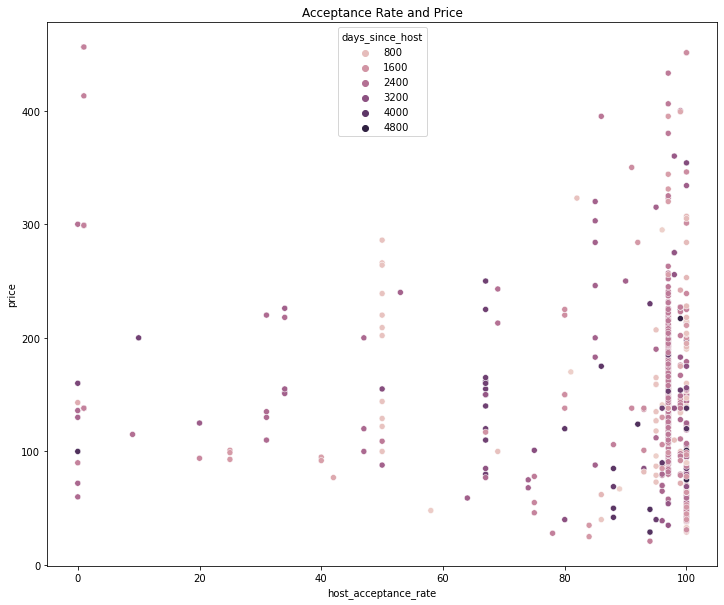

In [117]:
# Plotting location review and price
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = 'host_acceptance_rate', y = 'price', hue = 'days_since_host')
plt.title('Acceptance Rate and Price')

Text(0.5, 1.0, 'Listing Count and Availability')

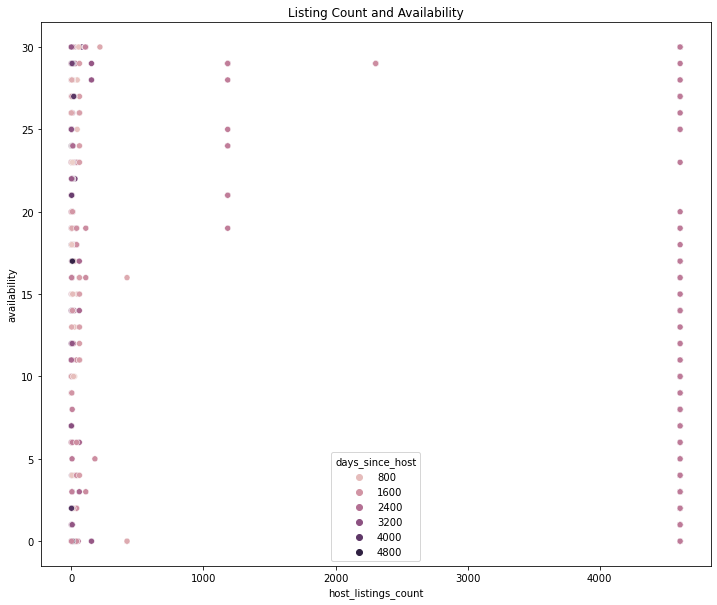

In [115]:
# plotting accuracy review and avail
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = 'host_listings_count', y = 'availability', hue = 'days_since_host')
plt.title('Listing Count and Availability')

In [118]:
# EXPORT DF TO PICKLE
df.to_pickle("./Model_no_review.pkl")